In [1]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns

In [2]:
# Loading Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [6]:
# Filter for US Data Analyst Roles
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]

In [7]:
# Show top five rows in data set
df_DA_US.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,None,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p..."
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,None,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'..."


In [9]:
# Show column data types
df_DA_US.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67816 entries, 36 to 785705
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        67816 non-null  object        
 1   job_title              67816 non-null  object        
 2   job_location           67582 non-null  object        
 3   job_via                67809 non-null  object        
 4   job_schedule_type      67107 non-null  object        
 5   job_work_from_home     67816 non-null  bool          
 6   search_location        67816 non-null  object        
 7   job_posted_date        67816 non-null  datetime64[ns]
 8   job_no_degree_mention  67816 non-null  bool          
 9   job_health_insurance   67816 non-null  bool          
 10  job_country            67816 non-null  object        
 11  salary_rate            8442 non-null   object        
 12  salary_year_avg        4350 non-null   float64       
 13  sala

In [10]:
# Shows summary stats of numerical columns 
df_DA_US.describe()

,job_posted_date,salary_year_avg,salary_hour_avg
count,67816,4350.000000,3980.000000
mean,2023-06-15 03:16:27.397118464,94553.964924,38.312172
min,2023-01-01 00:00:04,25000.000000,8.000000
25%,2023-03-12 18:02:09.750000128,71262.500000,24.000000
50%,2023-06-11 18:49:23.500000,90000.000000,33.000000
75%,2023-09-08 19:01:58.249999872,112500.000000,50.000000
max,2023-12-31 23:31:54,375000.000000,391.000000
std,NaN,33248.650655,18.758708


In [14]:
# Show top ten job locations and put it in a dataframe
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()
df_plot

,count
job_location,
Anywhere,5106
"New York, NY",3035
"Atlanta, GA",2741
"Chicago, IL",2337
"Austin, TX",1919
"Dallas, TX",1862
"Washington, DC",1592
"Charlotte, NC",1433
"Tampa, FL",1431


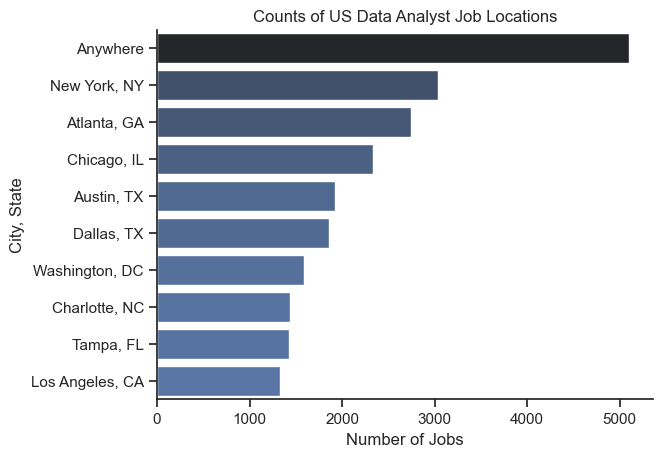

In [28]:
# Use seaborn to plot job location counts
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of US Data Analyst Job Locations')
plt.ylabel('City, State')
plt.xlabel('Number of Jobs')
plt.show()

0 job_work_from_home Work from Home
1 job_no_degree_mention Job Degree Req
2 job_health_insurance Health Insurance Offered


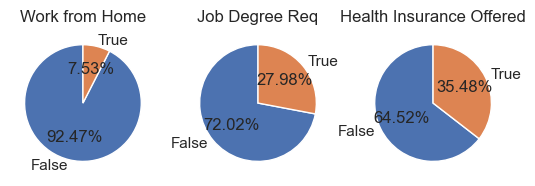

In [26]:
fig, ax = plt.subplots(1,3)

# Specify and rename boolean value columns to plot
dict_column = {
    'job_work_from_home':'Work from Home',
    'job_no_degree_mention':'Job Degree Req',
    'job_health_insurance':'Health Insurance Offered'
}

# Plot Percentages of boolean value colums listed above
for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), startangle=90, autopct='%1.2f%%', labels=['False', 'True'])
    ax[i].set_title(title)
    print(i, column, title)



plt.show()

In [ ]:
# Explore specific companies higher Data Analysts in the US


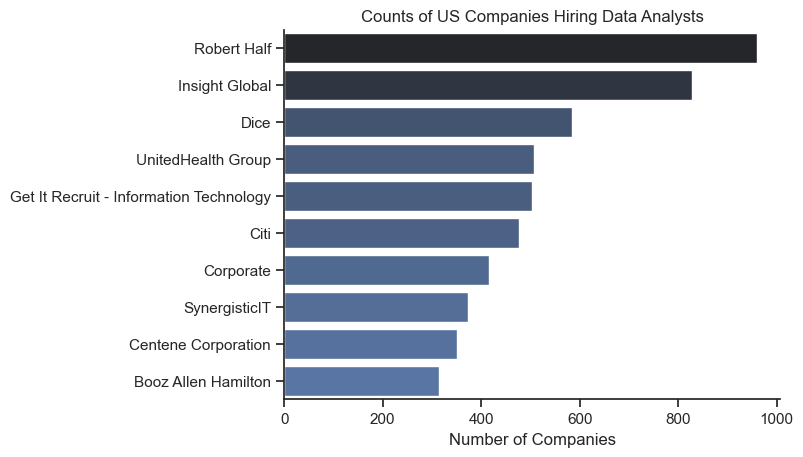

In [32]:
# Show top ten companies hiring Data Analysts and put it in a dataframe
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

# Use Seabprn to plot Top 10 Companies
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of US Companies Hiring Data Analysts')
plt.ylabel('')
plt.xlabel('Number of Companies')
plt.show()